In [ ]:
! pip install pandas
! pip install numpy 

! pip install scikit-learn
! pip install matplotlib




In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [13]:
df= pd.read_csv('penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


Text(0, 0.5, 'Culmen_depth_mm')

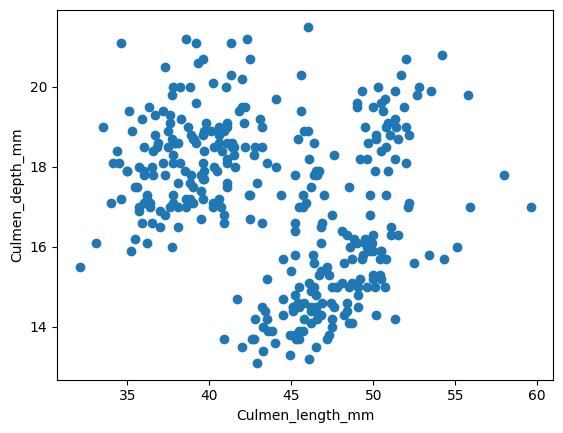

In [20]:
plt.scatter(df.culmen_length_mm, df.culmen_depth_mm)
plt.xlabel("Culmen_length_mm")
plt.ylabel("Culmen_depth_mm")

In [24]:
missing_values = df.isnull().sum()
print(missing_values)



culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [26]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0])


In [36]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['culmen_length_mm', 'culmen_depth_mm']])
y_predicted
df['cluster'] = y_predicted  # New column to see the output of our model
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,0.254545,0.666667,181.0,3750.0,MALE,0
1,0.269091,0.511905,186.0,3800.0,FEMALE,2
2,0.298182,0.583333,195.0,3250.0,FEMALE,2
3,0.327273,0.464286,190.0,3800.0,MALE,2
4,0.167273,0.738095,193.0,3450.0,FEMALE,0


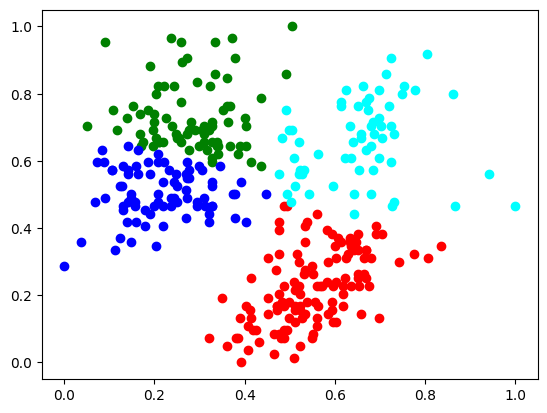

In [39]:
km.cluster_centers_
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
df4= df[df.cluster==3]

plt.scatter(df1.culmen_length_mm, df1["culmen_depth_mm"], c='green')
plt.scatter(df2.culmen_length_mm, df2["culmen_depth_mm"], c='red')
plt.scatter(df3.culmen_length_mm, df3["culmen_depth_mm"], c='blue')
plt.scatter(df4.culmen_length_mm, df4["culmen_depth_mm"], c='cyan')

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[["culmen_depth_mm"]])
df["culmen_depth_mm"] = scaler.transform(df[["culmen_depth_mm"]])

scaler.fit(df[["culmen_length_mm"]])
df["culmen_length_mm"] = scaler.transform(df[["culmen_length_mm"]])




In [45]:
km1 = KMeans(n_clusters=4)
y_predicted = km1.fit_predict(df[["culmen_length_mm", "culmen_depth_mm"]])
y_predicted
df['cluster'] = y_predicted
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,0.254545,0.666667,181.0,3750.0,MALE,1
1,0.269091,0.511905,186.0,3800.0,FEMALE,1
2,0.298182,0.583333,195.0,3250.0,FEMALE,1
3,0.327273,0.464286,190.0,3800.0,MALE,1
4,0.167273,0.738095,193.0,3450.0,FEMALE,1


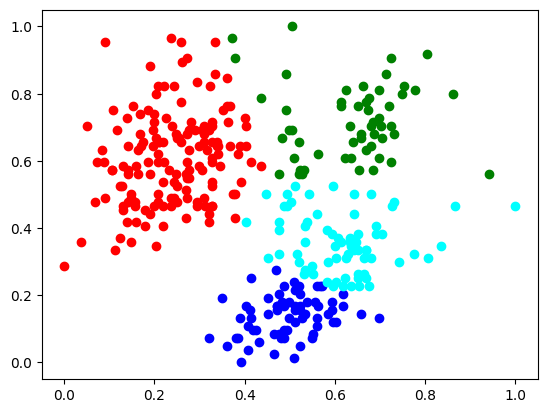

In [46]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
df4= df[df.cluster==3]
#df1:
plt.scatter(df1.culmen_length_mm, df1["culmen_depth_mm"], c='green')
#df2:
plt.scatter(df2.culmen_length_mm, df2["culmen_depth_mm"], c='red')
#df3:
plt.scatter(df3.culmen_length_mm, df3["culmen_depth_mm"], c='blue')
plt.scatter(df4.culmen_length_mm, df4["culmen_depth_mm"], c='cyan')

ELBOW METHODS 

In [47]:
sse= []
k_range = range(1,10)

for k in k_range:
    km_3 = KMeans(n_clusters=k)
    km_3.fit(df[["culmen_length_mm", "culmen_depth_mm"]])
    sse.append(km_3.inertia_)

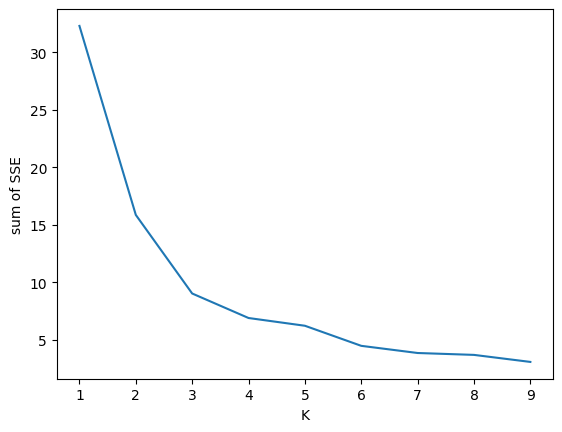

In [49]:
plt.xlabel("K")
plt.ylabel("sum of SSE")
plt.plot(k_range, sse)